# 第二章　随机数的产生

作者：[王何宇](http://person.zju.edu.cn/wangheyu)

[浙江大学数学科学学院](http://www.math.zju.edu.cn)

本文档配合讲义第二章的内容。讲义中的代码和图形都可在此验证。

In [1]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

## 程序例子：经典 Fibonacci 产生器

我们来验证经典 Fibonacci 产生器的缺陷。

In [2]:
def rand_add_mod(X0, X1, M, N):
    X = np.zeros(N)
    X[0] = X0
    X[1] = X1
    for i in range(2, N):
        X[i] = (X[i - 2] + X[i - 1]) % M
    return X / (M - 1)

产生随机数的参数比较不好搞，下面产生的是5000个U(0, 1)的伪随机数。

In [3]:
X = rand_add_mod(197, 39, 65535, 5000)

我们直接用点图看一下它的均匀性，似乎不错？

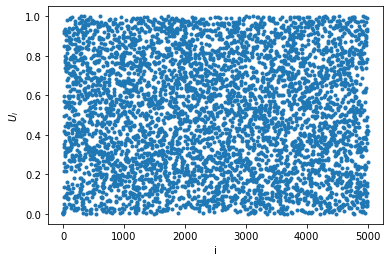

In [4]:
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")
plt.savefig("add_mod_random_test.pdf")

而接下去这段诡异的过程可以称为“找规律”。给出一个特殊的抽样，使得样本出现强烈的规律性。

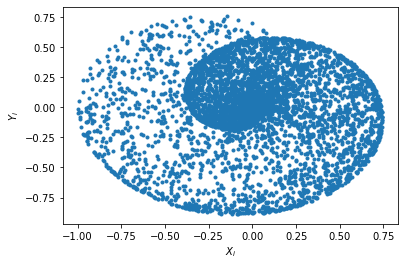

In [6]:
x = np.zeros(4998)
y = np.zeros(4998)
for i in range(1,4998):
    x[i] = np.sqrt(X[i]) * np.cos(2 * np.pi * X[i + 1]) * np.sin(np.pi * X[i + 2])
    y[i] = np.sqrt(X[i]) * np.sin(2 * np.pi * X[i + 1]) * np.sin(np.pi * X[i + 2])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.savefig("add_mod_random_fail.pdf")    

先调入三维绘图库。

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

再补一刀，加同余的三维分布：

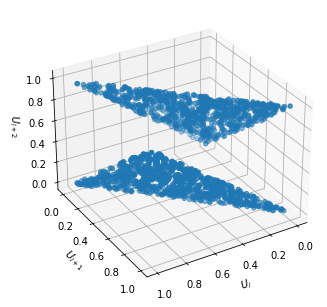

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(azim=59)
ax.scatter(X[0:-2:3], X[1:-1:3], X[2:-1:3])
ax.set_xlabel("$U_{i}$")
ax.set_ylabel("$U_{i + 1}$")
ax.set_zlabel("$U_{i + 2}$")
plt.savefig("RANDU_fail.pdf")

## 程序例子：线性同余产生器

线性同余产生器是目前仍在广泛使用的一个方法。但一般需要和其他方法组合使用。

In [9]:
def rand_mul_mod(X0, M, A, C, N):
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        X[i] = (A * X[i - 1] + C) % M
    return X / (M - 1)

先看两个不恰当选择参数所产生的问题。

In [10]:
X = rand_mul_mod(13, 2147483647, 7, 0, 5000) #BAD

同样，仅从一维序列角度并看不出有什么问题。

Text(0, 0.5, '$U_i$')

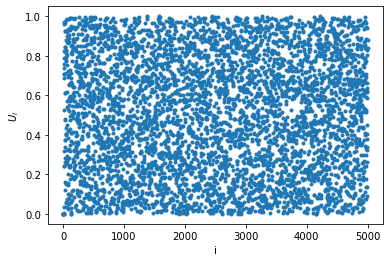

In [11]:
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")

然而，其2维分布就相当令人感伤了。

Text(0, 0.5, '$U_{i + 1}$')

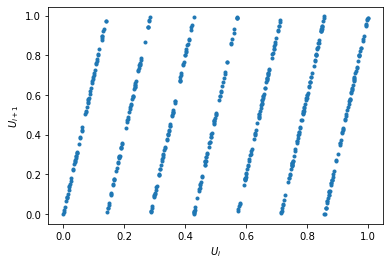

In [12]:
plt.plot(X[0:-2:10],X[1:-1:10],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")

同样的，它也没有逃过螺旋线的控制（尽管已经不是Fibonacci了）。

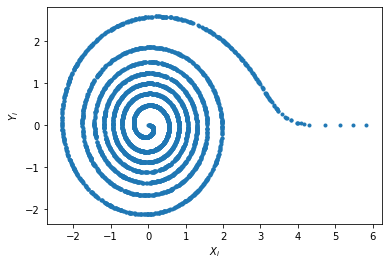

In [13]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.savefig("mul_mod_random_fail.pdf")    

再来一个。一维总是很OK的。

Text(0, 0.5, '$U_i$')

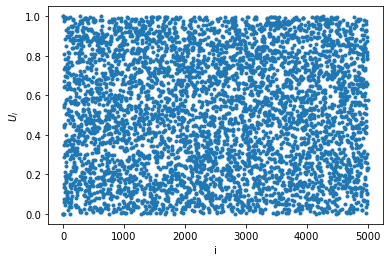

In [14]:
X = rand_mul_mod(13, 2147483647, 2147483630, 0, 5000) #BAD
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")

但二维和正态分布都挂了。

Text(0, 0.5, '$U_{i + 1}$')

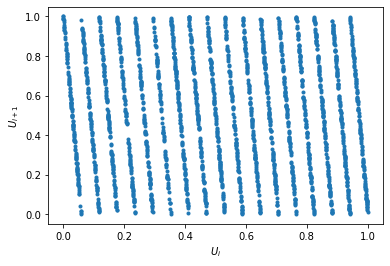

In [15]:
plt.plot(X[0:-2:2],X[1:-1:2],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")

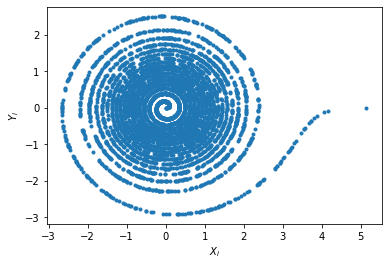

In [16]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.savefig("mul_mod_random_fail.pdf")

按么根据数论原理精挑细选会不会好点呢？这里有一组在IBM 360系统上用了很多年的经典参数：

Text(0, 0.5, '$U_i$')

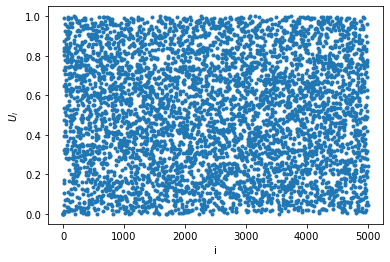

In [17]:
X = rand_mul_mod(1, 2147483648, 65539, 0, 5000) #IBM 360
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")

二维检验，通过！

Text(0, 0.5, '$U_{i + 1}$')

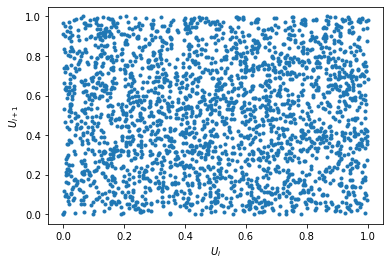

In [18]:
plt.plot(X[0:-2:2],X[1:-1:2],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")

正态分布检验，也通过！IBM还是有的门道滴...

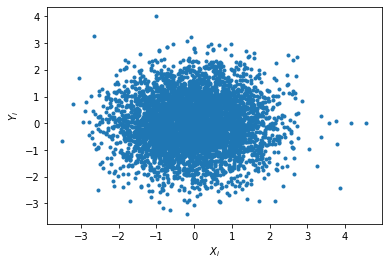

In [19]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.savefig("mul_mod_random_fail.pdf")

然而...看看三维？

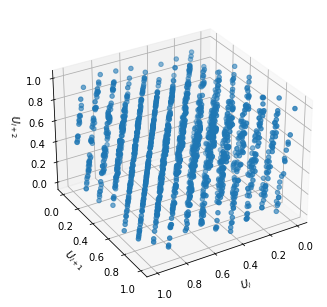

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(azim=59)
ax.scatter(X[0:-2:3], X[1:-1:3], X[2:-1:3])
ax.set_xlabel("$U_{i}$")
ax.set_ylabel("$U_{i + 1}$")
ax.set_zlabel("$U_{i + 2}$")
plt.savefig("RANDU_fail.pdf")

这个办法在单独的线性同余生成器中是必须面对的，所以在生成高维数据时，必须小心。否则你可能就是在这些平面采样，而不是在全空间采样。

## 程序例子：梅森旋转MT19937实现

下面的例子在cnblog上网友xlxw的blog《Python下探究随机数的产生原理和算法》，网址：

[https://www.cnblogs.com/lzxwalex/p/6880748.html](https://www.cnblogs.com/lzxwalex/p/6880748.html)

提供的代码基础上修改而成，并参考了CSDN网友tick\_tokc97的blog《伪随机数生成——梅森旋转（Mersenne Twister/MT）算法笔记》，网址：

[https://blog.csdn.net/tick_tock97/article/details/78657851](https://blog.csdn.net/tick_tock97/article/details/78657851)

MT19937是基于32位整数的算法，首先定义一个规范32位字长的函数。

In [21]:
def inter(t):
    return(0xFFFFFFFF & t) #取最后32位->t

梅森旋转需要一个工作区，MT19937的工作区长度是624，初始化过程如下：

In [22]:
def mainset(seed, M):
    M[0] = seed    #seed
    for i in range(1,624):
        M[i] = inter(1812433253 * (M[i - 1] ^ M[i - 1] >> 30) + i)
    return M

接下去是关键的一步：对工作区进行梅森旋转。

In [23]:
def twister(M):
    for i in range(624):
        # 截取M[i]高位和M[i+1](越界就返回M[0])低位，用普通加法合并，对齐32位
        # 这里高位取了1位，低位取了31位。
        y = inter((M[i] & 0x80000000) +(M[(i + 1) % 624] & 0x7fffffff))
        yA = y >> 1
        if y & 1 == 1: #取最低位
            yA = yA ^ 0x9908b0df
        M[i] = M[(i + 397) % 624] ^ yA
    return M

实际的随机数生成依赖工作区进行递推，因此每产生624个随机数，需要新旋转工作区。

In [24]:
def exnum(M, index):
    y = M[index]
    y = y ^ y >> 11
    y = y ^ y << 7 & 2636928640
    y = y ^ y << 15 & 4022730752
    y = y ^ y >> 18
    index = index + 1
    return inter(y)

主流程如下

In [25]:
def MT19937(seed,num):
    U = [0]*num
    M = [0]*624
    M = mainset(seed, M)
    twister(M)
    for i in range(num):
        index = i % 624
        U[i] = exnum(M, index) / (2**32 - 1)
        if (index == 623):
            twister(M)
    return U     

测试一下：

Text(0, 0.5, '$X_i$')

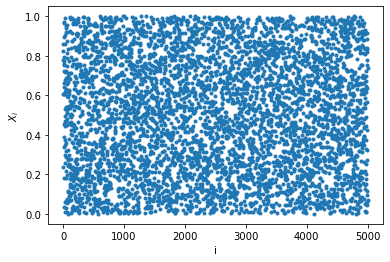

In [26]:
X=MT19937(13, 5000)
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$X_i$")

以及二维正态分布：

Text(0, 0.5, '$Y_i$')

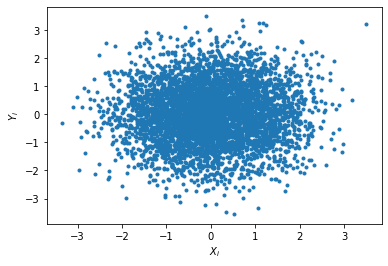

In [27]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")

下面生成了500个1000维随机向量（一共50万个随机数，MT19937还是很快）。

In [28]:
X=np.zeros(500000)
X=MT19937(13, 500000)
X=(np.reshape(X,(500,1000))).T # 最后转置一下

看一下$(X_1, X_2)$和$(X_{999}, X_{1000})$两个平面的的分布情况。

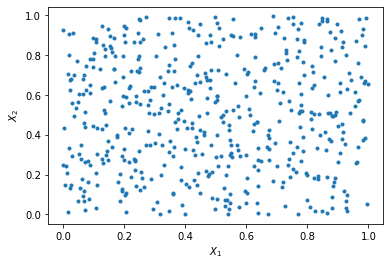

In [29]:
plt.plot(X[0,:],X[1,:],'.')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.savefig("MT19937_X1X2.pdf")

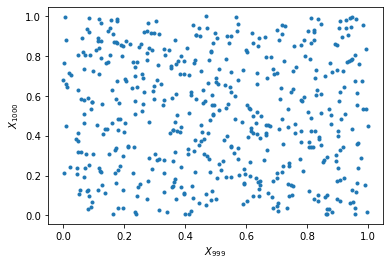

In [30]:
plt.plot(X[998,:],X[999,:],'.')
plt.xlabel("$X_{999}$")
plt.ylabel("$X_{1000}$")
plt.savefig("MT19937_X999X1000.pdf")